In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from src import AcFCM

In [38]:
def display_img(img: np.ndarray, cmap: str = None):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.imshow(img, cmap=cmap)
    plt.show()

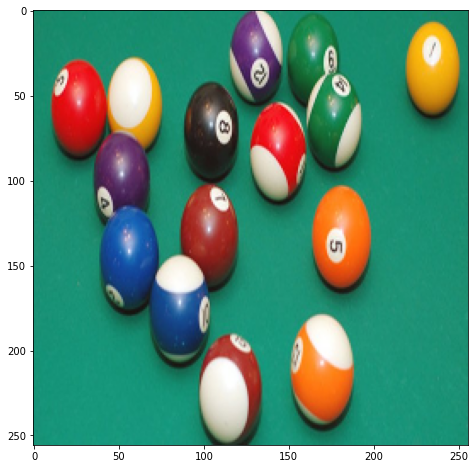

In [44]:
img = cv2.imread('data/balls1.jpg')
img = cv2.resize(img, (256, 256))
img_2d = img.reshape(-1, 3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img_1d = gray_img.reshape(-1, 1)
gray_img_1d = np.float32(gray_img_1d) / 255.

display_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [45]:
model = AcFCM(img_2d, init_c=10, m=2.5)
U, V = model.run(eps=0.01)

V_XB: 0.8822157179344445, clusters: 10
V_XB: 0.1253016264902083, clusters: 9
V_XB: 0.27565785014480215, clusters: 8
V_XB: 0.09621596509335364, clusters: 7
V_XB: 0.08287349849706219, clusters: 6
V_XB: 0.043743363772558226, clusters: 5


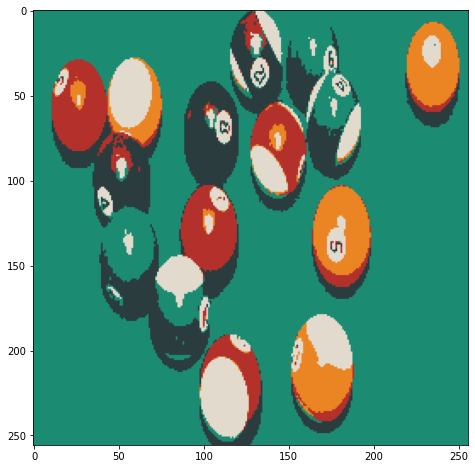

In [46]:
labels = np.argmax(U, axis=1)
color_mask = img_2d.copy()

for c in range(model.c):
    color_mask[labels == c] = np.mean(color_mask[labels == c], axis=0)
color_mask = color_mask.reshape(*gray_img.shape, 3)

display_img(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))